In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from ipywidgets import widgets

In [ ]:
from tensorflow.keras.datasets import cifar10
# This gives you everything (images and labels) in 1 second
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

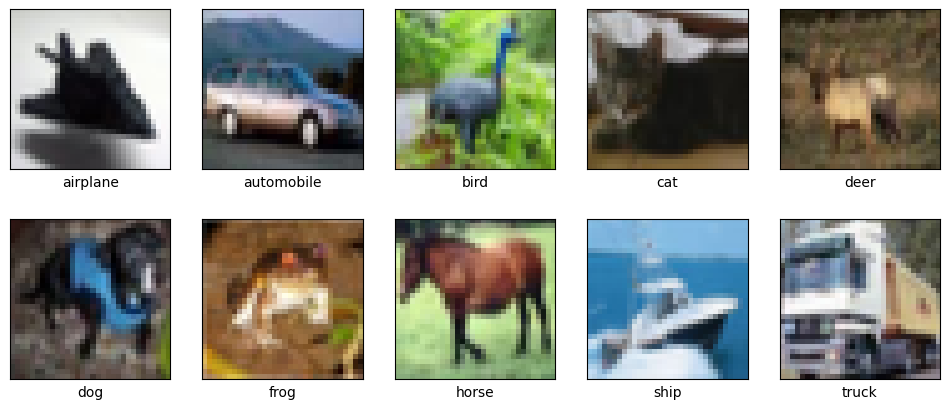

In [ ]:
plt.figure(figsize=(12, 5))

# Loop through each of the 10 classes
for i in range(10):
    # Find the index of the first image belonging to class 'i'
    index = np.where(y_train == i)[0][0]

    # Select the image
    img = x_train[index]

    # Create a subplot
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    plt.xlabel(class_names[i])

plt.show()

In [ ]:
# --- Training Set Counts ---
unique_train, counts_train = np.unique(y_train, return_counts=True)
train_counts = dict(zip(class_names, counts_train))

print("--- Training Set ---")
for name, count in train_counts.items():
    print(f"Total training {name} images: {count}")

print("\n" + "-"*20 + "\n")

# --- Test Set Counts ---
unique_test, counts_test = np.unique(y_test, return_counts=True)
test_counts = dict(zip(class_names, counts_test))

print("--- Test Set ---")
for name, count in test_counts.items():
    print(f"Total test {name} images: {count}")

--- Training Set ---
Total training airplane images: 5000
Total training automobile images: 5000
Total training bird images: 5000
Total training cat images: 5000
Total training deer images: 5000
Total training dog images: 5000
Total training frog images: 5000
Total training horse images: 5000
Total training ship images: 5000
Total training truck images: 5000

--------------------

--- Test Set ---
Total test airplane images: 1000
Total test automobile images: 1000
Total test bird images: 1000
Total test cat images: 1000
Total test deer images: 1000
Total test dog images: 1000
Total test frog images: 1000
Total test horse images: 1000
Total test ship images: 1000
Total test truck images: 1000


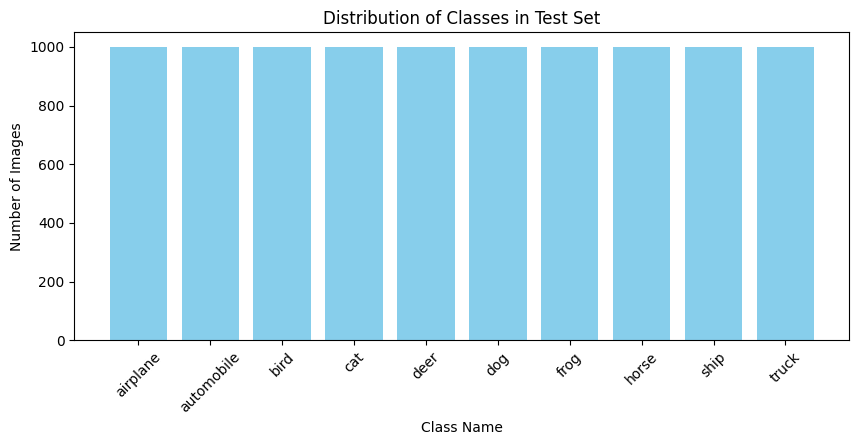

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(test_counts.keys(), test_counts.values(), color='skyblue')
plt.title('Distribution of Classes in Test Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers, Model

# Load the InceptionV3 model from the assignment
# We exclude the top (classification) layer because we want to use our own for CIFAR-10
# Note: InceptionV3 officially requires 75x75 images, but we can bypass this or resize
pre_trained_model = InceptionV3(input_shape=(75, 75, 3),
                                include_top=False,
                                weights='imagenet')

# Freeze all the layers so they aren't trained
for layer in pre_trained_model.layers:
    layer.trainable = False

# Summary to see the architecture
# pre_trained_model.summary()

In [ ]:
# 1. Grab the layer
last_layer = pre_trained_model.get_layer('mixed7')

# 2. Access the shape via the .output attribute (the tensor)
# Change .output_shape to .output.shape
print('last layer output shape: ', last_layer.output.shape)

# 3. Define the output point for transfer learning
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for CIFAR-10's 10 classes
x = layers.Dense(10, activation='softmax')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 37, 37,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 35, 35,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 35, 35,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 17, 17,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 17, 17,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 15, 15,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 12,519,850 (47.76 MB)

 Trainable params: 3,544,586 (13.52 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
model.compile(tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Resizing images to 75x75 to satisfy InceptionV3 requirements
def preprocess_images(images, labels):
    images = tf.cast(images, tf.float32) / 255.0  # Normalize to [0,1]
    images = tf.image.resize(images, (75, 75))    # Resize
    return images, labels

# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).map(preprocess_images).batch(32)
validation_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).map(preprocess_images).batch(32)

In [ ]:
SHUFFEL_BUFFER_SIZE = 50000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
train_dataset_final = train_dataset.cache().shuffle(SHUFFEL_BUFFER_SIZE).prefetch(PREFETCH_BUFFER_SIZE)
validation_dataset_final = validation_dataset.cache().prefetch(PREFETCH_BUFFER_SIZE)

In [ ]:
# Define the callback class
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check if accuracy is greater than 0.90
        if(logs.get('accuracy') is not None and logs.get('accuracy') > 0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

# Instantiate the callback
callbacks = myCallback()

In [ ]:
# Train the model with the callback
history = model.fit(
            train_dataset_final, # Or your training data variable
            validation_data=validation_dataset_final,
            epochs=20, # Set a high number; the callback will stop it early
            verbose=1,
            callbacks=[callbacks] # Add the callback here
)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.6717 - loss: 0.9452 - val_accuracy: 0.7845 - val_loss: 0.6231
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8198 - loss: 0.5221 - val_accuracy: 0.7986 - val_loss: 0.5819
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8587 - loss: 0.4117 - val_accuracy: 0.8012 - val_loss: 0.5680
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8888 - loss: 0.3302 - val_accuracy: 0.8069 - val_loss: 0.5639
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9168 - loss: 0.2605
Reached 90% accuracy so cancelling training!
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9168 - loss: 0.2605 - val_accuracy: 0.8145 - val_loss: 0.5609


In [ ]:
from io import BytesIO
from IPython.display import display
# 1. Create the widgets
uploader = widgets.FileUpload(accept="image/*", multiple=True)
out = widgets.Output()

def file_predict(filename, file_stream, output_area):
    # Load image at 32x32 to match your notebook's standard
    img = tf.keras.utils.load_img(file_stream, target_size=(32, 32))
    img_array = tf.keras.utils.img_to_array(img)

    # Normalize (matches your training preprocessing)
    img_array = img_array / 255.0

    # Add batch dimension: shape (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict using the model (which now includes the internal Resizing layer)
    predictions = model.predict(img_array, verbose=0)

    class_idx = np.argmax(predictions[0])
    predicted_label = class_names[class_idx]
    confidence = 100 * np.max(predictions[0])

    with output_area:
        print(f"File: {filename} | Prediction: {predicted_label} ({confidence:.2f}%)")

def on_upload_change(change):
    uploaded_data = change.new

    # Check if the data is a dictionary (Older ipywidgets / certain Colab versions)
    if isinstance(uploaded_data, dict):
        for name, file_info in uploaded_data.items():
            # In dict mode, 'content' is usually inside the value dictionary
            content = file_info['content']
            file_predict(name, BytesIO(content), out)

    # Check if the data is a list or tuple (Modern ipywidgets 8.0+)
    else:
        for file_info in uploaded_data:
            name = file_info['name']
            content = file_info['content']
            file_predict(name, BytesIO(content), out)

# 2. Observe the value change and display
uploader.observe(on_upload_change, names='value')
display(uploader, out)

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

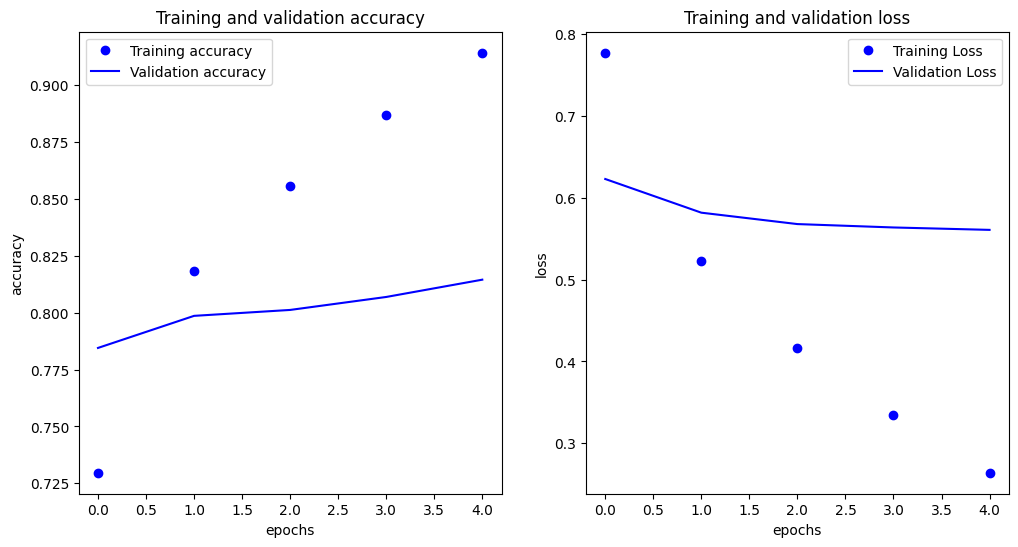

In [ ]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

plot_loss_acc(history)

In [ ]:
model.save('cifar10_model.keras')